# A Simple Tutorial - How to Handle Missing Data ?

#### Data in real world are rarely clean and homogeneous. Typically this is because of the following reasons

### Primary Reasons for Missing Data|  

- Corrupt data  
- Failure to load information 
- Incomplete extraction
- Noisy, and inconsistent
- Incomplete data

 
So it is an important task of a Data scientist to prepossess the data by filling missing values because making the right decision on how to handle it generates robust data models. It is important to be handled as they could lead to wrong prediction or classification for any given model being used. The goal of this article is to cover the basic techniques for handling missing values in a dataset.

Real-world data often has missing values. 

Let us look at the titanic dataset example as a good starting point to under this concept in detail.


# Key Objectives

Specifically, after completing this tutorial you will know:

- How to marking invalid or corrupt values as missing in your dataset.
- How to remove rows with missing data from your dataset.
- How to impute missing values with mean values in your dataset.


Let’s get started.

First let us load the data 

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data
train = pd.read_csv('train - train_titanic.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now let us find out the missing values.

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can easily understand from above that features like ‘Age’, ‘Fare’, ‘Cabin’ and ‘Embarked’ contains missing values. Lets analyse deeper to look at in detail.

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


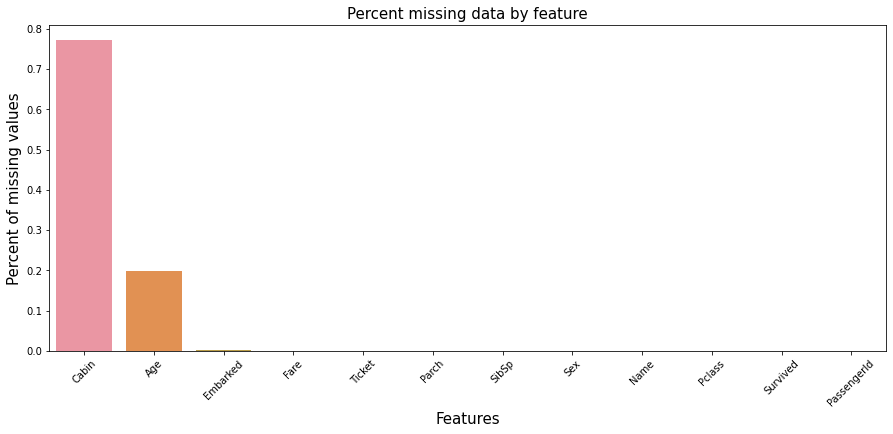

In [3]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='45')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

Let us look now at some sample observations in the dataset to see how the data is looking like .

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the above sample it is observed that NaN are present.

In general missing values could be: NaN, empty string, ?,-1,-99,-999 and so on. In order to understand if -1 is a missing value or not we could draw a histogram. *If this variable has a uniform distribution between 0 and 1 and it has a small peak at -1 then -1 is actually a missing value.*

Missing values can be hidden from us and by hidden mean replaced by some other value beside NaN. Therefore, it is always beneficial to plot a histogram in order to identify those values.

So as an example let us plot a histogram for Age feature as it is a numerical feature.

<AxesSubplot:xlabel='Age'>

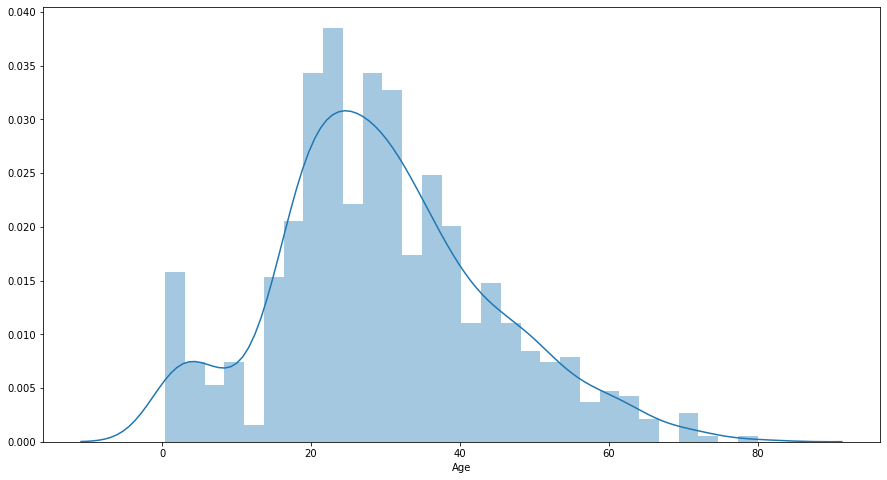

In [5]:
# Plot histogram using seaborn
plt.figure(figsize=(15,8))
sns.distplot(train.Age, bins =30)

Firstly we cannot simply ignore missing values in a dataset. We must handle them in some way for the very practical reason that most algorithms do not accept missing values.

"Common sense" is not sensible here.From my experience the 2 most commonly recommended ways of dealing with missing data actually are not accurate .

They are:

1. Dropping observations that have missing values
2. Imputing the missing values based on other observations

Dropping missing values is sub-optimal because when we drop observations, we drop information.

The fact that the value was missing may be informative in itself.We need to understand business deeper to uncover why this information is missing in real world problems.In real time problems we need to make predictions even if some of the features are missing !!!.


Imputing missing values is sub-optimal because the value was originally missing but you filled it in, which always leads to a loss in information, no matter how sophisticated our imputation method is.

"<b>Missingness</b>" is almost always informative in itself, and we should tell our algorithm if a value was missing.Even if we build a model to impute our values, we are not adding any real information. You’re just reinforcing the patterns already provided by other features.

Basically, **there are three categories of missing data**. We assume that each record or observation can be divided into an "observable component" and an "unobservable component". We also assume that the records are independent and identically distributed.

1. **MCAR (Missing Completely At Random)** where the pattern of missinginess is statistically independent of the data record. Example: you have a data set on a piece of paper and you spill coffee on the paper destroying part of the data.

2. **MAR (Missing At Random)** where the probability distribution of the pattern of missingness is functionally dependent upon the observable component in the record. MCAR is a special case of MAR. Example: you have a question on a survey asking if the survey participant is a drug addict and another question which asks if the survey participant has less than one alcoholic drink per year. Assume the answer to the alcoholic drink question is always observable, then the probability that someone fails to answer the drug addict question is most likely functionally dependent upon their answer to the alcoholic drink question.

3. **MNAR (Missing Not at Random)** which is defined as the case which is NOT MAR. In the MNAR case, you can have situations where both the drug addict and alcoholic drink questions are absent in the same record. Another example, is a case where the question is: "What is your gender?" Suppose that females are less likely to answer this question than males. This is another example of an MNAR question because the probability that the answer is observable is conditionally dependent upon the unobservable component of the data record.

Now that we know the basic terminology,I like to share some strategies and recommendations

### Important Strategies:

1. We should never insert mean, mode, median, max, min or anything else for missing values. That is, avoid deterministic imputation even though it is widely used and available in most software packages. It underestimates and distorts the statistical regularities (e.g., underestimates variance is one example) present in the data sample. 

2. If the data records are MCAR Then you can delete records with missing data.

3. If the data records are MCAR, then sometimes you can stochastically impute the missing values rather than deterministically impute them. So this means that if you specify the marginal probability distribution of a missing value as Gaussian with some known mean and some known variance then you can sample from that distribution to impute values into the data set. We need to be careful and do some additional research  and analysis on data ,understand the business completely and take a judicious decision.

4. If the data is MAR then an algorithm such as Expectation Maximization can be used to handle the missing observations.

5. If the data is MNAR we can include binary indicators in the data record which explicitly identify when a variable is not observable. The challenge with this approach is that a highly nonlinear model needs to be designed to properly integrate this information in an appropriate manner. This might work in a machine learning algorithm where the binary indicators "disconnect" the influence of predictors which are not observable. Consequently, the MNAR theory (i.e., the theory of the joint distribution of the complete data record and missing data pattern) is instantiated in the learning machine's probabilistic model of its statistical environment.


### Missing numeric data

For missing numeric data, we should flag and fill the values.

1. Flag the observation with an indicator variable of missingness.
2. Secondly fill the original missing value with 0 just to meet the technical requirement of no missing values.

By using this technique of flagging and filling, we are essentially allowing the algorithm to estimate the optimal constant for missingness, instead of just filling it in with the mean.

### Missing categorical data

The best way to handle missing data for categorical features is to simply label them as ’Missing’!

1. We are essentially adding a new class for the feature.
2. This tells the algorithm that the value was missing.
3. This also gets around the technical requirement for no missing values.

## Missing values Treatment Techniques

#### 1. Deleting Data 
This method is the most commonly used to handle the null values. Here, we either delete a particular record if it has a null value for a particular feature ,and a particular feature if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. 

Note : One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

Imagine we drop one whole observation just because one of the features had a missing value, even if the rest of the features are perfectly filled and informative!

In [6]:
df = train
# Will drop all features with missing values 
df.dropna(inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

You can also select to drop the rows only if all of the values in the row are missing.

In [7]:
df1 = train
# Will drop the rows only if all of the values in the row are missing
df1.dropna(how = 'all',inplace = True)

Sometimes, we may just want to drop a feature that has some missing values.

In [8]:
df = train
# Will drop a feature that has some missing values.
df.dropna(axis = 1,inplace = True)

Suppose we want to keep only the rows with at least 4 non-na values

In [9]:
df = train
# Keep only the rows with at least 4 non-na values
df.dropna(thresh = 4,inplace = True)

In summary it is always better to keep data than to delete them.

**The only case that it may worth deleting a variable is when its missing values are more than 60% of the observations but only if that variable is insignificant.Taking this into consideration, imputation is always a preferred choice over deleting variables.**

### Pros:
- Complete removal of data with missing values results in robust and highly accurate model
- Deleting a particular row or a column with no specific information is better, since it does not have a high weightage

### Cons:
- Loss of information and data
- Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset

### 2. Back-fill or Forward-fill
Back-fill or forward-fill to propagate next or previous values respectively.

In [10]:
df = train
# for back fill
df.fillna(method='bfill',inplace=True)
# for forward-fill
df.fillna(method='ffill',inplace=True)

** Key Note:** NaN value will remain even after forward filling or back filling if a next or previous value isn’t available or it is also a NaN value.

### 3. Replace with constant value

Replace with some constant value outside fixed value range-999,-1 etc
This method is useful as it gives the possibility to group missing values as a separate category represented by a constant value. It is a preferred option when it doesn’t make sense to try and predict a missing value. The downside is that performance of linear models can suffer.Use a global constant to fill in for missing values.
For example, in the titanic dataset filling in the missing value of the Embarked feature with the most common Port of Embarkation might not really makes sense as opposed to using something like “N/A”.

In [11]:
# Replace with a constant value
# dataframe.Column_Name.fillna(-99,inplace=True)

### 4. Replacing With Mean/Median/Mode

This strategy can be applied on a feature which has numeric data like the age of a person or the ticket fare. We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. This method is also called as** leaking the data while training**. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear.  

**MEAN:** Suitable for continuous data without outliers

In [12]:
df3 = train
df3['Age'].isnull().sum()

0

In [13]:
df3['Age'].mean()

35.6744262295082

In [14]:
df3['Age'].replace(np.NaN, df3['Age'].mean()).head(15)

1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
21    34.0
23    28.0
27    19.0
52    49.0
54    65.0
62    45.0
66    29.0
75    25.0
88    23.0
92    46.0
Name: Age, dtype: float64

As you see above in the fifth row the mean value is replaced in place of NaN.

**MEDIAN :** Suitable for continuous data with outliers

In [15]:
df4 = train
df4['Age'].fillna(df4['Age'].median(),inplace=True)
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


**Mode:** For categorical feature we can select to fill in the missing values with the most common value(mode) as illustrated below.

In [16]:
data_cat=train
data_cat['Embarked'].fillna(data_cat['Embarked'].mode()[0], inplace=True)
data_cat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Pros:
* This is a better approach when the data size is small
* It can prevent data loss which results in removal of the rows and columns

### Cons:
- Imputing the approximations add variance and bias
- Works poorly compared to other multiple-imputations method


**Note:** Mean, Median and Mode imputation diminishes any correlations involving the variable(s) that are imputed. This is because we assume that there is no relationship between the imputed variable and any other measured variables. Thus, those imputations have some attractive properties for univariate analysis but become problematic for multivariate analysis.

### 5. Assigning An Unique Category

A categorical feature will have a definite number of possibilities, such as gender, for example. Since they have a definite number of classes, we can assign another class for the missing values. Here, the features Cabin and Embarked have missing values which can be replaced with a new category, say, U for ‘unknown’. This strategy will add more information into the dataset which will result in the change of variance. Since they are categorical, we need to find one hot encoding to convert it to a numeric form for the algorithm to understand it. 

In [17]:
data_unique = train
data_unique['Cabin'].head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
52            D33
54            B30
Name: Cabin, dtype: object

In [18]:
data_unique['Cabin'].fillna('U').head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
52            D33
54            B30
Name: Cabin, dtype: object

### Pros:

* Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical
* Negates the loss of data by adding an unique category

### Cons:

* Adds less variance
* Adds another feature to the model while encoding, which may result in poor performance


# Out of Shelve Tools:

## 1. missingno:
In the case of a real-world dataset, it is very common that some values in the dataset are missing. We represent these missing values as NaN (Not a Number) values. But to build a good machine learning model our dataset should be complete. That’s why we use some imputation techniques to replace the NaN values with some probable values. But before doing that we need to have a good understanding of how the NaN values are distributed in our dataset.

**Missingno** library offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and compatible with Pandas.

In [19]:
import missingno as msno

## Matrix:
Visualising missing values for a sample of 150
Using this matrix you can very quickly find the pattern of missingness in the dataset.

<AxesSubplot:>

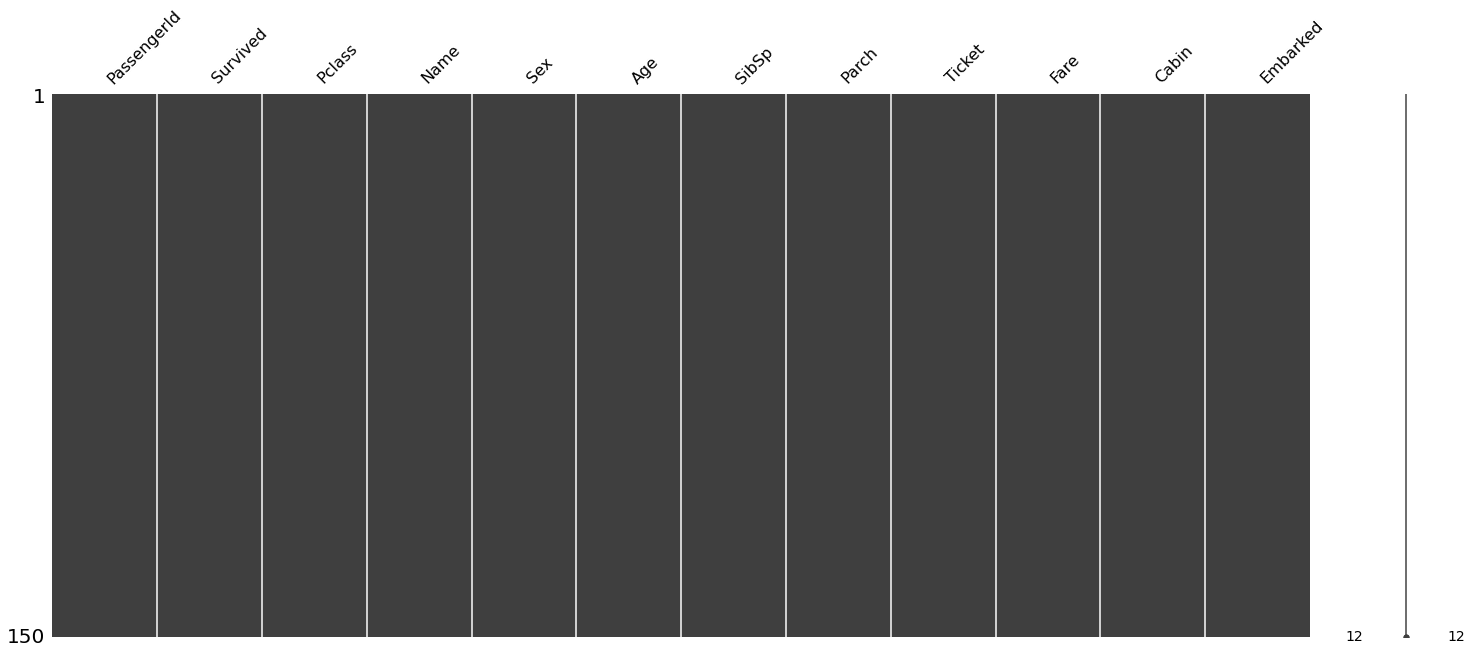

In [20]:
msno.matrix(train.sample(150))

## Heatmap
* The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

C:\Users\sumai\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\sumai\Anaconda3\lib\site-packages\seaborn\matrix.py:280: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

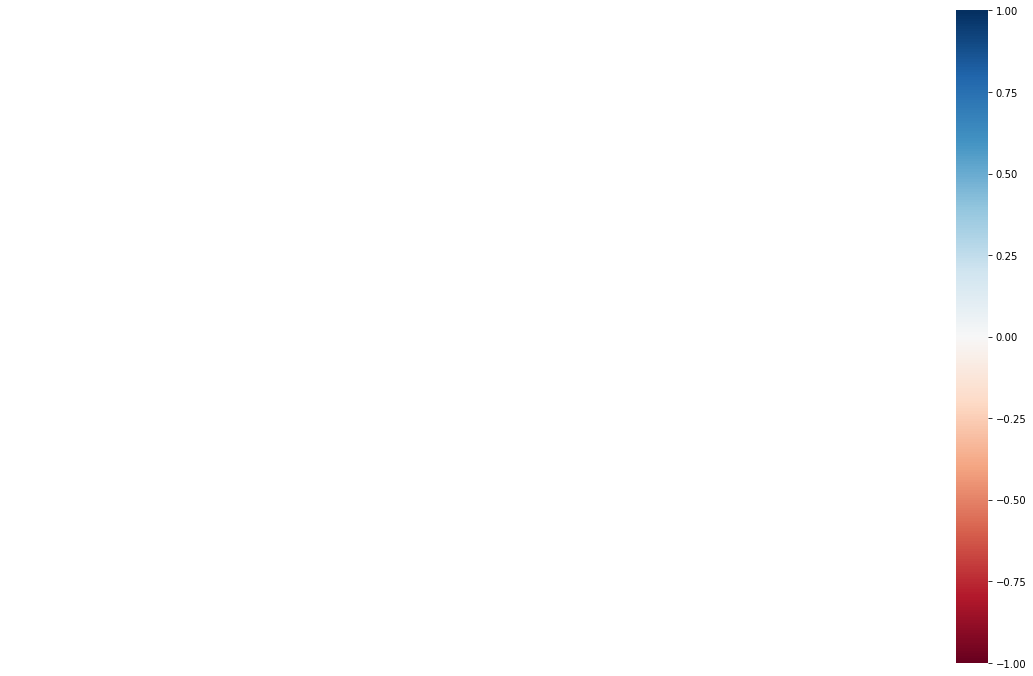

In [21]:
msno.heatmap(train)

#### Bar Chart :
This bar chart gives you an idea about how many missing values are there in each column.

<AxesSubplot:>

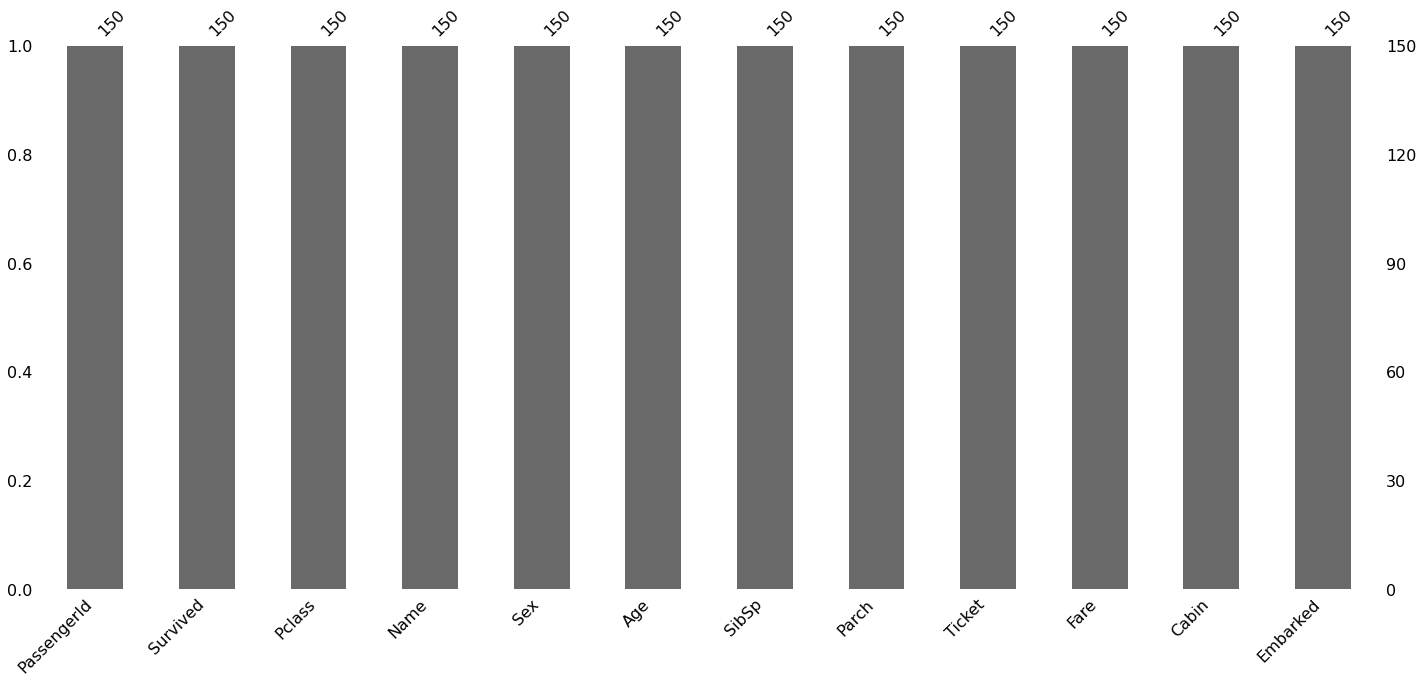

In [22]:
msno.bar(train.sample(150))

## Dendogram:
The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

Cluster leaves which split close to zero, but not at it, predict one another very well, but still imperfectly. If your own interpretation of the dataset is that these columns actually are or ought to be match each other in nullity , then the height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.

As with matrix, only up to 50 labeled columns will comfortably display in this configuration. However the dendrogram more elegantly handles extremely large datasets by simply flipping to a horizontal configuration.

C:\Users\sumai\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2837: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

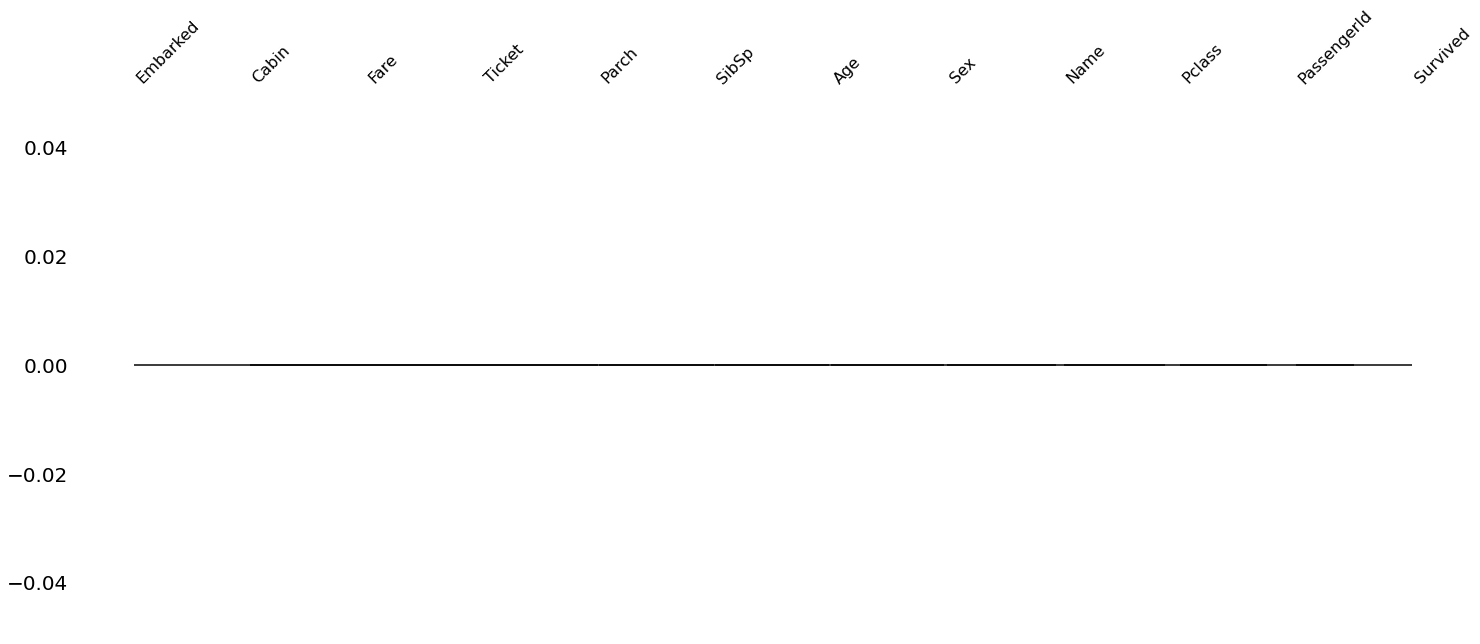

In [23]:
msno.dendrogram(train)

## 2.PandasProfiling 
Python package to help understand data quickly

In [1]:
!pip install --user pandas-profiling

#!conda install -c anaconda pandas-profiling

In [3]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train)
prof.to_file(output_file='output.html')

C:\Users\sumai\AppData\Roaming\Python\Python37\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [4]:
pandas_profiling.version.__version__

NameError: name 'pandas_profiling' is not defined

## Summary

* The approach to deal with missing values is heavily dependent on the nature of the dataset
* It is always useful to ask, why there are missing values?Understand the business context.
* Different ways of handling missing data have difference effects on the performance of models.
* Useful ready made tools for quicker view of missing values using missingno and Pandas Profiling